Dataset Loaded Successfully.
Total Rows: 17880 | Total Columns: 18
------------------------------
Class Distribution:
fraudulent
0    17014
1      866
Name: count, dtype: int64
------------------------------
Training Set Shape: (14304,)
Test Set Shape: (3576,)
------------------------------
Vectorizing text data... (This may take a moment)
Training Logistic Regression Model...
Model Training Complete!
------------------------------
Model Accuracy: 96.76%

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3403
           1       0.61      0.90      0.73       173

    accuracy                           0.97      3576
   macro avg       0.80      0.93      0.86      3576
weighted avg       0.98      0.97      0.97      3576



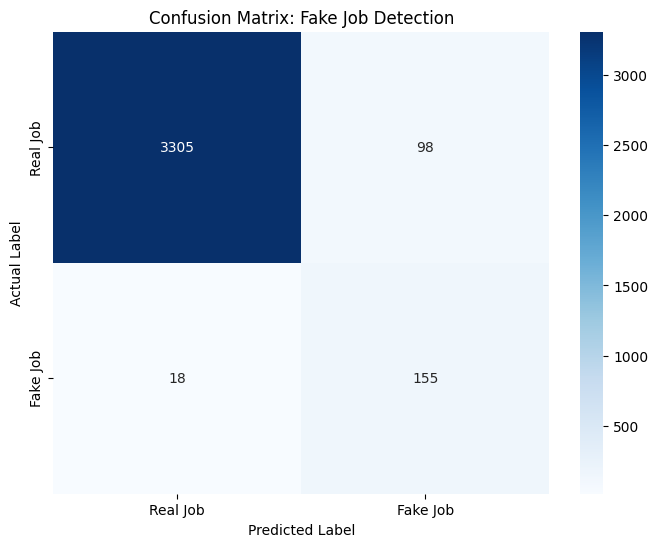

In [1]:
# ==========================================
# 1. IMPORTS & SETUP
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # Used to save the model for the website/app later

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ==========================================
# 2. LOAD DATASET
# ==========================================
# Ensure 'fake_job_postings.csv' is in the same folder as this notebook
df = pd.read_csv("fake_job_postings.csv")

print(f"Dataset Loaded Successfully.")
print(f"Total Rows: {df.shape[0]} | Total Columns: {df.shape[1]}")
print("-" * 30)

# Check class distribution (Real vs Fake)
print("Class Distribution:")
print(df['fraudulent'].value_counts())
print("-" * 30)

# ==========================================
# 3. DATA CLEANING & PREPROCESSING
# ==========================================
# We combine key text columns to give the model more context.
# Fraudsters often hide clues in the 'company_profile' or 'requirements'.
text_columns = ['title', 'company_profile', 'description', 'requirements', 'benefits']

# Fill missing values with empty strings to prevent errors
for col in text_columns:
    df[col] = df[col].fillna("")

# Create a single 'text' column combining all information
df['text'] = df[text_columns].apply(lambda x: ' '.join(x), axis=1)

# Basic cleaning: Convert to lowercase
df['text'] = df['text'].str.lower()

# Define Features (X) and Target (y)
X = df['text']
y = df['fraudulent']

# ==========================================
# 4. TRAIN-TEST SPLIT
# ==========================================
# stratify=y ensures both train and test sets have the same % of fake jobs.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")
print("-" * 30)

# ==========================================
# 5. FEATURE EXTRACTION (TF-IDF)
# ==========================================
# Convert text to numbers.
# max_features=5000: Focuses on the top 5,000 most important words.
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

print("Vectorizing text data... (This may take a moment)")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ==========================================
# 6. MODEL TRAINING (Logistic Regression)
# ==========================================
# class_weight='balanced': Crucial for this dataset!
# It tells the model to pay MORE attention to the minority class (Fake jobs).
model = LogisticRegression(max_iter=1000, class_weight='balanced')

print("Training Logistic Regression Model...")
model.fit(X_train_tfidf, y_train)
print("Model Training Complete!")
print("-" * 30)

# ==========================================
# 7. EVALUATION
# ==========================================
# Predict on the unseen test set
y_pred = model.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred))

# ==========================================
# 8. VISUALIZATION (Confusion Matrix)
# ==========================================
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Real Job', 'Fake Job'], 
            yticklabels=['Real Job', 'Fake Job'])
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix: Fake Job Detection')
plt.show()

# ==========================================
# 9. SAVE MODEL FOR DEMO
# =

In [2]:
import joblib

# Run this to generate the missing files!
joblib.dump(model, 'fake_job_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("✅ SUCCESS: Files created! Check your sidebar explorer now.")

✅ SUCCESS: Files created! Check your sidebar explorer now.
